In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## saving the wind generation data (the target variable) for all regions into dataframes

In [2]:
windgenDE = pd.read_csv("data/time_series_60min_singleindex.csv",
                        usecols=(lambda s: s.startswith('utc') | 
                                 s. startswith('DE_wind_generation')),
                        parse_dates=[0], index_col=0)

windgenFR = pd.read_csv("data/time_series_60min_singleindex.csv",
                        usecols=(lambda s: s.startswith('utc') | 
                                 s. startswith('FR_wind_onshore_generation')),
                        parse_dates=[0], index_col=0)

windgenPL = pd.read_csv("data/time_series_60min_singleindex.csv",
                        usecols=(lambda s: s.startswith('utc') | 
                                 s. startswith('PL_wind_onshore_generation')),
                        parse_dates=[0], index_col=0)

windgenDK = pd.read_csv("data/time_series_60min_singleindex.csv",
                        usecols=(lambda s: s.startswith('utc') | 
                                 s. startswith('DK_wind_onshore_generation')),
                        parse_dates=[0], index_col=0)

windgenAT = pd.read_csv("data/time_series_60min_singleindex.csv",
                        usecols=(lambda s: s.startswith('utc') | 
                                 s. startswith('AT_wind_onshore_generation')),
                        parse_dates=[0], index_col=0)

## saving the wind weather data (the features) into dataframes

In [3]:
windspeedDE = pd.read_csv("data/weather_data.csv",
                usecols=(lambda s: s.startswith('utc') | 
                         s.startswith('DE_windspeed')),
                parse_dates=[0], index_col=0)

windspeedFR = pd.read_csv("data/weather_data.csv",
                usecols=(lambda s: s.startswith('utc') | 
                         s.startswith('FR_windspeed')),
                parse_dates=[0], index_col=0)

windspeedDK = pd.read_csv("data/weather_data.csv",
                usecols=(lambda s: s.startswith('utc') | 
                         s.startswith('DK_windspeed')),
                parse_dates=[0], index_col=0)

windspeedPL = pd.read_csv("data/weather_data.csv",
                usecols=(lambda s: s.startswith('utc') | 
                         s.startswith('PL_windspeed')),
                parse_dates=[0], index_col=0)


windspeedAT = pd.read_csv("data/weather_data.csv",
                usecols=(lambda s: s.startswith('utc') | 
                         s.startswith('AT_windspeed')),
                parse_dates=[0], index_col=0)

## Next two cells are identical in purpose but if you get a tz-naive error you need to run the other block of code. The block of code needed differs based on system

In [4]:
# start_remove = pd.to_datetime('2016-01-01')
# end_remove = pd.to_datetime('2017-01-01')

# start_test = pd.to_datetime('2015-01-01')
# end_test = pd.to_datetime('2016-01-01')

In [5]:
start_remove = pd.to_datetime('2016-01-01', utc = True)
end_remove = pd.to_datetime('2017-01-01', utc = True)

start_test = pd.to_datetime('2015-01-01', utc = True)
end_test = pd.to_datetime('2016-01-01', utc = True)

## Limiting the data to just data from 2015 & 2016. Only these two years are consistent for most of the regions. Other years may be missing generation data

In [6]:
windspeedtrainFR = windspeedFR.loc[(windspeedFR.index >= start_remove) & (windspeedFR.index < end_remove)]
windgenerationtrainFR = windgenFR.loc[(windgenFR.index >= start_remove) & (windgenFR.index < end_remove)]

windspeedtestFR = windspeedFR.loc[(windspeedFR.index >= start_test) & (windspeedFR.index < end_test)]
windgenerationtestFR = windgenFR.loc[(windgenFR.index >= start_test) & (windgenFR.index < end_test)]

In [7]:
windspeedtrainDK = windspeedDK.loc[(windspeedDK.index >= start_remove) & (windspeedDK.index < end_remove)]
windgenerationtrainDK = windgenDK.loc[(windgenDK.index >= start_remove) & (windgenDK.index < end_remove)]

windspeedtestDK = windspeedDK.loc[(windspeedDK.index >= start_test) & (windspeedDK.index < end_test)]
windgenerationtestDK = windgenDK.loc[(windgenDK.index >= start_test) & (windgenDK.index < end_test)]

In [8]:
windspeedtrainPL = windspeedPL.loc[(windspeedPL.index >= start_remove) & (windspeedPL.index < end_remove)]
windgenerationtrainPL = windgenPL.loc[(windgenPL.index >= start_remove) & (windgenPL.index < end_remove)]

windspeedtestPL = windspeedPL.loc[(windspeedPL.index >= start_test) & (windspeedPL.index < end_test)]
windgenerationtestPL = windgenPL.loc[(windgenPL.index >= start_test) & (windgenPL.index < end_test)]

In [9]:
windspeedtrainAT = windspeedAT.loc[(windspeedAT.index >= start_remove) & (windspeedAT.index < end_remove)]
windgenerationtrainAT = windgenAT.loc[(windgenAT.index >= start_remove) & (windgenAT.index < end_remove)]

windspeedtestAT = windspeedAT.loc[(windspeedAT.index >= start_test) & (windspeedAT.index < end_test)]
windgenerationtestAT = windgenAT.loc[(windgenAT.index >= start_test) & (windgenAT.index < end_test)]

In [10]:
windspeedtrainDE = windspeedDE.loc[(windspeedDE.index >= start_remove) & (windspeedDE.index < end_remove)]
windgenerationtrainDE = windgenDE.loc[(windgenDE.index >= start_remove) & (windgenDE.index < end_remove)]

windspeedtestDE = windspeedDE.loc[(windspeedDE.index >= start_test) & (windspeedDE.index < end_test)]
windgenerationtestDE = windgenDE.loc[(windgenDE.index >= start_test) & (windgenDE.index < end_test)]

## changing the names of the columns in the features to one common name so that they concatenate properly

In [11]:
windspeedtrainFR = windspeedtrainFR.rename({"utc_timestamp": "timestamp", "FR_windspeed_10m": "windspeed"}, axis='columns')

In [12]:
windspeedtrainDK = windspeedtrainDK.rename({"utc_timestamp": "timestamp", "DK_windspeed_10m": "windspeed"}, axis='columns')

In [13]:
windspeedtrainPL = windspeedtrainPL.rename({"utc_timestamp": "timestamp", "PL_windspeed_10m": "windspeed"}, axis='columns')

In [14]:
windspeedtrainAT = windspeedtrainAT.rename({"utc_timestamp": "timestamp", "AT_windspeed_10m": "windspeed"}, axis='columns')

In [15]:
windspeedtrainDE = windspeedtrainDE.rename({"utc_timestamp": "timestamp", "DE_windspeed_10m": "windspeed"}, axis='columns')

In [16]:
windspeedformatted = pd.concat([windspeedtrainFR, windspeedtrainAT, windspeedtrainDK], sort=False)

## changing the names of the columns in the target variable to one common name so that they concatenate properly

In [17]:
windgenerationtrainFR = windgenerationtrainFR.rename({"utc_timestamp": "timestamp", "FR_wind_onshore_generation_actual": "wind_generation"}, axis='columns')

In [18]:
windgenerationtrainDK = windgenerationtrainDK.rename({"utc_timestamp": "timestamp", "DK_wind_onshore_generation_actual": "wind_generation"}, axis='columns')

In [19]:
windgenerationtrainPL = windgenerationtrainPL.rename({"utc_timestamp": "timestamp", "PL_wind_onshore_generation_actual": "wind_generation"}, axis='columns')

In [20]:
windgenerationtrainAT = windgenerationtrainAT.rename({"utc_timestamp": "timestamp", "AT_wind_onshore_generation_actual": "wind_generation"}, axis='columns')

In [21]:
windgenerationtrainDE = windgenerationtrainDE.rename({"utc_timestamp": "timestamp", "DE_wind_generation_actual": "wind_generation"}, axis='columns')

In [22]:
windgenerationtrainAT = windgenerationtrainAT / 395.2

In [23]:
windgenerationtrainDK = windgenerationtrainDK / 313.1

In [24]:
windgenerationtrainFR = windgenerationtrainFR / 2471

In [25]:
windgenerationdataformatted = pd.concat([windgenerationtrainFR, windgenerationtrainAT, windgenerationtrainDK], sort=False)

## The wind generation data is measured in Mega Watts and even then has a large magnitude. Here changing the magnitude so that it's in Giga Watts

In [26]:
windgenerationdataformatted = windgenerationdataformatted * 1e-3

In [27]:
windgenerationtestPL = windgenerationtestPL * 1e-3

In [28]:
windgenerationtestDE = windgenerationtestDE * 1e-3

In [29]:
windgenerationtrainDK = windgenerationtrainDK * 1e-3

In [30]:
windgenerationtrainFR = windgenerationtrainFR * 1e-3

In [31]:
windgenerationtrainAT = windgenerationtrainAT * 1e-3

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [33]:
#function to print out generation averages for hour and day. This is used as a visual representation of the data
#later will throw train data and predicted data to see how they fair
#summing up all the hourly generation numbers to product the total production for the year
#then doing division for the averages
def energy_production(energy):
    total_energy = np.sum(energy)
    avg_energy_per_hour = total_energy / energy.shape[0]
    avg_energy_per_day = total_energy / (energy.shape[0] / 24)
    print("Energy Data measured in Giga Watts")
    print("Total energy:", total_energy)
    print("Average Energy Per Hour:", avg_energy_per_hour)
    print("Average Energy Per Day:", avg_energy_per_day)

## Creating the model fitting on the concatenated dataset and predicting on PL

In [34]:
# fitting the model with the concatenated dataset and target variables
model = LinearRegression().fit(windspeedformatted,windgenerationdataformatted)

In [35]:
# using trained model to predict on new set of wind features
prediction = model.predict(windspeedtestPL)

In [36]:
timeseries = pd.date_range('2015-01-01', '2015-12-31 23:00:00', freq='H')

C:\Users\hong8\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


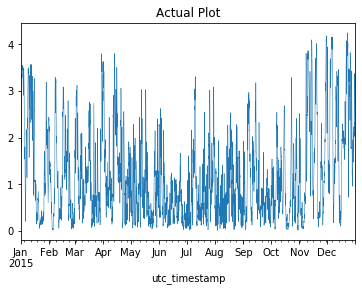

In [37]:
# plotting the actual generation plot
windgenerationtestPL.plot(linewidth=0.5, title='Actual Plot', legend=False)

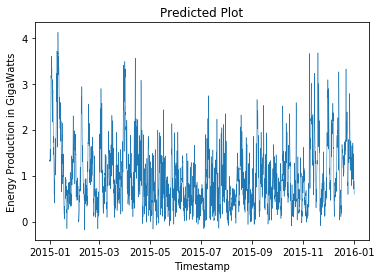

In [38]:
#plotting the predicted values
# prediction = prediction * 37970000
prediction = prediction * 477.6
plt.plot(timeseries,prediction, linewidth=0.5)
plt.xlabel('Timestamp')
plt.ylabel('Energy Production in GigaWatts')
plt.title('Predicted Plot')
plt.show()

In [39]:
print(r2_score(windgenerationtestPL, prediction))

0.6475958572233436


In [40]:
print(mean_squared_error(windgenerationtestPL, prediction))

0.34545604560927684


In [41]:
energy_production(windgenerationtestPL)

Energy Data measured in Giga Watts
Total energy: PL_wind_onshore_generation_actual    10644.233554
dtype: float64
Average Energy Per Hour: PL_wind_onshore_generation_actual    1.215095
dtype: float64
Average Energy Per Day: PL_wind_onshore_generation_actual    29.162284
dtype: float64


In [42]:
energy_production(prediction)

Energy Data measured in Giga Watts
Total energy: 8731.329684859844
Average Energy Per Hour: 0.996727132974868
Average Energy Per Day: 23.921451191396834


## Using the same model to predict on DE wind data

In [43]:
DE_prediction = model.predict(windspeedtestDE)

C:\Users\hong8\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


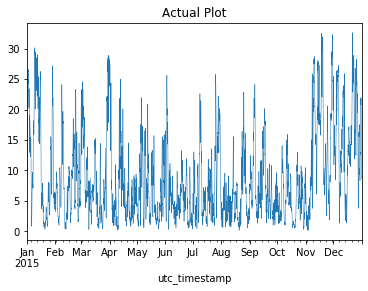

In [44]:
windgenerationtestDE.plot(linewidth=0.5, title='Actual Plot', legend=False)

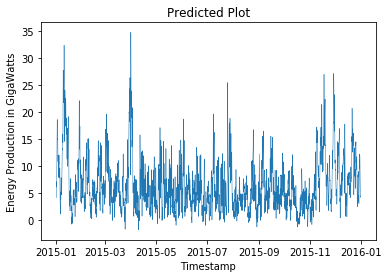

In [45]:
DE_prediction = DE_prediction * 3361
plt.plot(timeseries,DE_prediction, linewidth=0.5)
plt.xlabel('Timestamp')
plt.ylabel('Energy Production in GigaWatts')
plt.title('Predicted Plot')
plt.show()

In [46]:
print(r2_score(windgenerationtestDE, DE_prediction))

0.627935297708879


In [47]:
print(mean_squared_error(windgenerationtestDE, DE_prediction))

19.061929898129435


In [48]:
energy_production(windgenerationtestDE)

Energy Data measured in Giga Watts
Total energy: DE_wind_generation_actual    77468.975
dtype: float64
Average Energy Per Hour: DE_wind_generation_actual    8.84349
dtype: float64
Average Energy Per Day: DE_wind_generation_actual    212.243767
dtype: float64


In [49]:
energy_production(DE_prediction)

Energy Data measured in Giga Watts
Total energy: 57130.118671611715
Average Energy Per Hour: 6.521703044704534
Average Energy Per Day: 156.5208730729088


## Train with just DK, test with PL

In [50]:
DK_model = LinearRegression().fit(windspeedtrainDK,windgenerationtrainDK)

In [51]:
DK_prediction = DK_model.predict(windspeedtestPL)

C:\Users\hong8\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


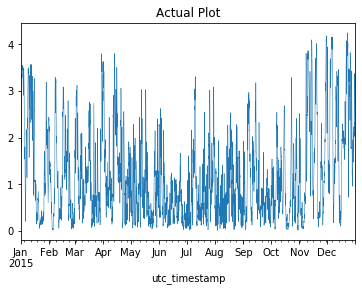

In [52]:
windgenerationtestPL.plot(linewidth=0.5, title='Actual Plot', legend=False)

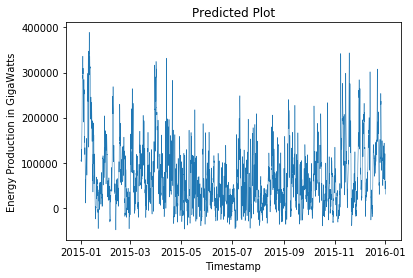

In [53]:
DK_prediction = DK_prediction * 37970000
plt.plot(timeseries,DK_prediction, linewidth=0.5)
plt.xlabel('Timestamp')
plt.ylabel('Energy Production in GigaWatts')
plt.title('Predicted Plot')
plt.show()

In [54]:
print(r2_score(windgenerationtestPL, DK_prediction))

-10377372161.46078


In [55]:
print(mean_squared_error(windgenerationtestPL, DK_prediction))

10172769033.908646


In [56]:
energy_production(windgenerationtestPL)

Energy Data measured in Giga Watts
Total energy: PL_wind_onshore_generation_actual    10644.233554
dtype: float64
Average Energy Per Hour: PL_wind_onshore_generation_actual    1.215095
dtype: float64
Average Energy Per Day: PL_wind_onshore_generation_actual    29.162284
dtype: float64


In [57]:
energy_production(DK_prediction)

Energy Data measured in Giga Watts
Total energy: 622621404.7826793
Average Energy Per Hour: 71075.50282907298
Average Energy Per Day: 1705812.0678977515


## Train on FR, test on PL

In [58]:
FR_model = LinearRegression().fit(windspeedtrainFR,windgenerationtrainFR)

In [59]:
FR_prediction = FR_model.predict(windspeedtestPL)

C:\Users\hong8\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


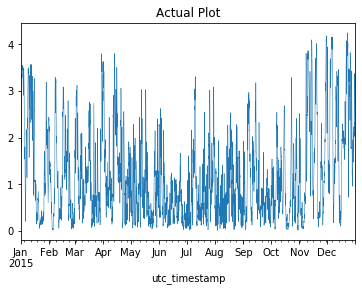

In [60]:
windgenerationtestPL.plot(linewidth=0.5, title='Actual Plot', legend=False)

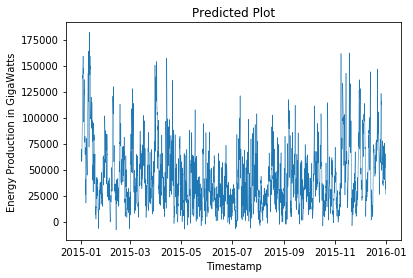

In [61]:
FR_prediction = FR_prediction * 37970000
plt.plot(timeseries,FR_prediction, linewidth=0.5)
plt.xlabel('Timestamp')
plt.ylabel('Energy Production in GigaWatts')
plt.title('Predicted Plot')
plt.show()

In [62]:
print(r2_score(windgenerationtestPL, FR_prediction))

-2963992157.7053275


In [63]:
print(mean_squared_error(windgenerationtestPL, FR_prediction))

2905553272.715592


In [64]:
energy_production(windgenerationtestPL)

Energy Data measured in Giga Watts
Total energy: PL_wind_onshore_generation_actual    10644.233554
dtype: float64
Average Energy Per Hour: PL_wind_onshore_generation_actual    1.215095
dtype: float64
Average Energy Per Day: PL_wind_onshore_generation_actual    29.162284
dtype: float64


In [65]:
energy_production(FR_prediction)

Energy Data measured in Giga Watts
Total energy: 386289422.553663
Average Energy Per Hour: 44096.9660449387
Average Energy Per Day: 1058327.1850785287


## Train on just AT and predict on PL

In [66]:
AT_model = LinearRegression().fit(windspeedtrainAT,windgenerationtrainAT)

In [67]:
AT_prediction = AT_model.predict(windspeedtestPL)

C:\Users\hong8\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


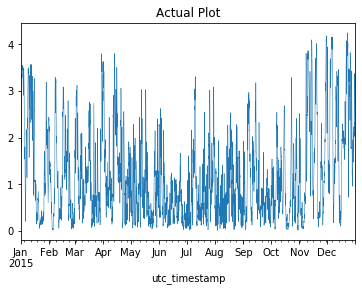

In [68]:
windgenerationtestPL.plot(linewidth=0.5, title='Actual Plot', legend=False)

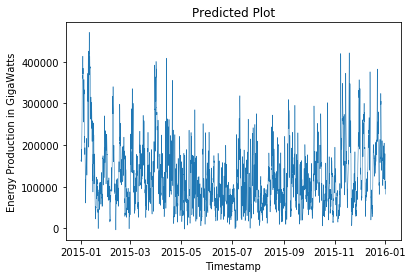

In [69]:
AT_prediction = AT_prediction * 37970000
plt.plot(timeseries,AT_prediction, linewidth=0.5)
plt.xlabel('Timestamp')
plt.ylabel('Energy Production in GigaWatts')
plt.title('Predicted Plot')
plt.show()

In [70]:
print(r2_score(windgenerationtestPL, AT_prediction))

-22440590490.34229


In [71]:
print(mean_squared_error(windgenerationtestPL, AT_prediction))

21998145626.765213


In [72]:
energy_production(windgenerationtestPL)

Energy Data measured in Giga Watts
Total energy: PL_wind_onshore_generation_actual    10644.233554
dtype: float64
Average Energy Per Hour: PL_wind_onshore_generation_actual    1.215095
dtype: float64
Average Energy Per Day: PL_wind_onshore_generation_actual    29.162284
dtype: float64


In [73]:
energy_production(AT_prediction)

Energy Data measured in Giga Watts
Total energy: 1108234054.2467935
Average Energy Per Hour: 126510.73678616364
Average Energy Per Day: 3036257.6828679275
